## import the libraries

In [1]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import tensorflow as tf
import warnings
warnings.filterwarnings 
import numpy as np
from gensim.models import Word2Vec
import multiprocessing
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._min_spanning_tree import minimum_spanning_tree
/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/_graph_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._graph_tools import csgraph_to_dense, csgraph_from_dense,\
/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._traversal import connected_components
/usr/lib/python2.7/dist-packages/sklearn/feature_extraction/hashing.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from . import _hashing
/usr/lib/python2.7/dist-packages/sklearn/utils/extmath.py:20: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._logistic_sigmoid import _log_logistic_s

## import data

In [2]:
file_data=pd.read_csv("/home/hadoop-user1/Documents/Datasets/laptop-reviews3.csv")

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.040939. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## extracting sentences and labels from data imported 

In [3]:
sent=file_data['sentences']

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.056850. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
sentiment=list(sent)

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.467717. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
sentiment

['i charge it at night and skip taking the cord with me because of the good battery life',
 'the tech guy then said the service center does not do #to# exchange and i have to direct my concern to the sales team which is the retail shop which i bought my netbook from',
 'it is of high quality has a killer gui is extremely stable is highly expandable is bundled with lots of very good applications is easy to use and is absolutely gorgeous',
 'easy to start up and does not overheat as much as other laptops',
 'i even got my teenage son one because of the features that it offers like ichat photobooth garage band and more',
 'great laptop that offers many great features',
 '\xc2\xa0one night i turned the freaking thing off after using it the next day i turn it on no gui screen all dark power light steady hard drive light steady and not flashing as it usually does',
 'i took it back for an asus and same thing blue screen which required me to remove the battery to reset',
 'in the shop these m

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.559497. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [6]:
labels1=file_data['0']

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.686450. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [7]:
labels1=list(labels1)

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.745796. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## tokenize the sentences

In [8]:
tokenizer = RegexpTokenizer(r'\w+')
## sent is the tokenize form of sentiments
#words is the list of all the words in the sentiments

sent=[]
words=[]

for i in sentiment:
    
        tr=map(str.lower,tokenizer.tokenize(i))
        sent.append(tr)
        words.extend(tr)
words.append('unk')        

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.834943. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## finding dictionary of words(word_to_id and id_to_word)

In [9]:
id_to_word=dict(enumerate(set(words)))

word_to_id={k:v for v,k in id_to_word.items()}
id_to_word,word_to_id

({0: 'limited',
  1: 'todays',
  2: 'magnetic',
  3: 'saves',
  4: 'mcbook',
  5: 'walmartcom',
  6: 'sleek',
  7: 'four',
  8: 'prices',
  9: 'sleep',
  10: 'saved',
  11: 'pieces\xc2',
  12: 'poorly',
  13: 'stinks',
  14: 'looking',
  15: 'replacements',
  16: 'backup',
  17: 'bays',
  18: 'swap',
  19: 'under',
  20: 'teaching',
  21: 'sorry',
  22: 'flicking',
  23: 'spec',
  24: 'updated',
  25: 'dell',
  26: 'comfterbale',
  27: 'hdtv',
  28: 'every',
  29: 'updates',
  30: 'chrismas',
  31: 'users\xc2',
  32: 'affect',
  33: 'vast',
  34: 'school',
  35: 'basics',
  36: 'upi',
  37: 'companies',
  38: 'solution',
  39: 'frozen',
  40: 'convenience',
  41: 'unrelated',
  42: 'comfortble',
  43: 'artist',
  44: 'ups',
  45: 'seemlessly',
  46: 'enjoy',
  47: 'securityprone',
  48: 'force',
  49: 'specially',
  50: 'tired',
  51: 'phones',
  52: 'specd',
  53: 'mail',
  54: 'direct',
  55: 'budget',
  56: 'second',
  57: 'louder',
  58: 'specs',
  59: 'machines',
  60: 'even',
  6

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:14.947664. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [10]:
vocab_size=len((set(words)))
vocab_size

3097

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.166107. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## converting words to indices of sentiments

In [11]:

train=[]

for i in range(len(sent)):
    
    train.append([word_to_id[x] for x in sent[i]])
   

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.193580. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
len(train)

1488

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.292707. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## padding to make all sequence of equal length

In [13]:
max_length = max([len(i) for i in sent])

for i in range(len(train)):
    
    train[i] =[j for j in train[i]] + [word_to_id['unk']] * (max_length - len(train[i]))
    sent[i] =[j for j in sent[i]] + ['unk'] * (max_length - len(sent[i]))

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.422761. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## dividing the dataset into train,validation and test set

In [14]:
test=train[1100:]
test_label=labels1[1100:]
train=train[:1100]
train_label=labels1[:1100]


/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.514711. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
valid=test[300:]
valid_label=test_label[300:]
test=test[:300]
test_label=test_label[:300]

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.590733. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
len(valid),len(test)

(88, 300)

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.701422. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
train = np.array(train)
train_label = np.array(train_label)
test = np.array(test)
test_label = np.array(test_label)

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.804666. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [18]:
train_label=np.reshape(train_label,[1100,-1])
test_label=np.reshape(test_label,[300,-1])
valid_label=np.reshape(valid_label,[88,-1])

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.898203. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## building Word Embeddings

In [19]:
cores = multiprocessing.cpu_count()
model = Word2Vec(sent, min_count=1, size=50, sg=1, iter=10, workers=cores, window=2)


/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:15.990546. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## mapping word embeddings to corresponding id

In [20]:
vec_x = np.zeros([vocab_size, 50])
len(vec_x)
for i, j in id_to_word.items():
    vec_x[i] = model[j]
    
# constant tensor for word embedding(one hot)

vec_x=tf.constant(vec_x,dtype=tf.float32)

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:16.761445. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
vec_x

<tf.Tensor 'Const:0' shape=(3097, 50) dtype=float32>

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:16.798805. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## one hot encoding as embedding  for labels(target)

In [22]:
vec_y = np.zeros((3, 3))

for k in labels1:
    vec_y[k][k] = 1
print vec_y

# constant tensor for word embedding(one hot)

vec_y = tf.constant(vec_y, dtype=tf.float32)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:16.869728. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [23]:
vec_y

<tf.Tensor 'Const_1:0' shape=(3, 3) dtype=float32>

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:16.961592. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## initializing variables

In [24]:
input_size = 50
output_size = 3
train_size=100
test_size=300
valid_size=88
hidden_layer = 64
learning_rate = 0.001

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:17.102693. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## weight initialization

In [25]:
Wgx=tf.Variable(tf.random_normal(([hidden_layer,input_size]),0.0,0.01),dtype=tf.float32)

Wgh=tf.Variable(tf.random_normal(([hidden_layer,hidden_layer]),0.0,0.010),dtype=tf.float32)
Wix=tf.Variable(tf.random_normal(([hidden_layer,input_size]),0.0,0.01),dtype=tf.float32)
Wih=tf.Variable(tf.random_normal(([hidden_layer,hidden_layer]),0.0,0.01),dtype=tf.float32)
Wfx=tf.Variable(tf.random_normal(([hidden_layer,input_size]),0.0,0.01),dtype=tf.float32)
Wfh=tf.Variable(tf.random_normal(([hidden_layer,hidden_layer]),0.0,0.01),dtype=tf.float32)
Wox=tf.Variable(tf.random_normal(([hidden_layer,input_size]),0.0,0.01),dtype=tf.float32)
Woh=tf.Variable(tf.random_normal(([hidden_layer,hidden_layer]),0.0,0.01),dtype=tf.float32)
Why=tf.Variable(tf.random_normal(([hidden_layer,output_size]),0.0,0.01),dtype=tf.float32)
bh = tf.zeros((hidden_layer, 1)) 
by = tf.zeros((output_size, 1)) 

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:17.190158. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## function to get samples of certain size randomly

In [26]:
def get_batch(x1, y1, train_size, random=False, start=0, end=0):
    if random:
        idx = np.random.choice(range(len(x1)), size=train_size, replace=False)
    else:
        idx = np.arange(start, end)
    return x1[idx], y1[idx]

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:17.424443. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## LSTM helper function(scan )

In [27]:
 def LSTM(s_and_h, x_t):
    with tf.variable_scope("LSTM"):
        x_t = tf.reshape(x_t, [-1, input_size])
        
        hprev = tf.reshape(s_and_h[0], [-1, hidden_layer])
        sprev = tf.reshape(s_and_h[1], [-1, hidden_layer])
        
        g_t=tf.tanh(tf.matmul(Wgx,tf.transpose(x_t) )+ tf.matmul(Wgh,tf.transpose(hprev)))
        
        i_t=tf.sigmoid(tf.matmul(x_t,tf.transpose(Wix) )+ (tf.matmul(hprev,tf.transpose(Wih))))
        
        f_t=tf.sigmoid(tf.matmul(x_t,tf.transpose(Wfx)) + tf.matmul(hprev,tf.transpose(Wfh)))
        
        o_t = tf.sigmoid(tf.matmul(x_t,tf.transpose(Wox)) + tf.matmul(hprev,tf.transpose(Woh)))
       
        s_t=tf.multiply(tf.transpose(g_t),i_t) + tf.multiply(f_t,sprev)
        
        h_t=tf.multiply(tf.tanh(s_t),o_t)

        s_and_h=[h_t,s_t]
        
        return s_and_h

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:17.434028. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [28]:
test_label.shape

(300, 1)

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:17.580182. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## the function to train the neural_net

In [29]:
loss_list_training=[]
loss_list_validation=[]
accuracy_list_training=[]
accuracy_list_validation=[]
iter_list=[]
def train_nn():
    with tf.variable_scope("train_nn"):
        x=tf.placeholder(shape=[None,max_length], dtype=tf.int32)
        y=tf.placeholder(shape=[None,None], dtype=tf.int32)
       
        hprev = tf.placeholder(shape=[None, hidden_layer], dtype=tf.float32)
        sprev = tf.placeholder(shape=[None, hidden_layer], dtype=tf.float32)
        
        con=[hprev,sprev]
        
        X_embed = tf.nn.embedding_lookup(vec_x,x)
        X_embed = tf.transpose(X_embed, [1, 0, 2])
        
        y_embed= tf.nn.embedding_lookup(vec_y,y)
      
        h_out = tf.scan(LSTM, X_embed, initializer=con)
        
        h_t=h_out[0]
        h_t=h_t[-1]
        
        test_target=tf.nn.embedding_lookup(vec_y,test_label)
        valid_target=tf.nn.embedding_lookup(vec_y,valid_label)
        
        
        preds=tf.matmul(h_t,Why)
        
        #takes the argmax of output to 
        preds_arg=tf.argmax(preds,axis=1)
        
        preds_one_hot=tf.nn.embedding_lookup(vec_y,preds_arg)
        
        loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=preds,labels=y_embed))
        optimizer=tf.train.AdamOptimizer(0.001).minimize(loss)
        
        with tf.Session() as session:
            
            session.run(tf.global_variables_initializer())
            session.run(tf.local_variables_initializer())
            
            for epoch in range(200):
                
                train_x,train_y=get_batch(train, train_label, train_size, random=True)
                
                _,l,out_train=session.run([optimizer,loss,preds_one_hot],feed_dict={x:train_x,y:train_y,hprev: np.zeros((train_size, hidden_layer)),
                sprev:np.zeros((train_size,hidden_layer))})
                
                if epoch%10==0:
                    
                    iter_list.append(epoch)
                    
                    ##finding accuracy of training samples
                    out_train=np.reshape(out_train,[train_size,-1])
            
                    correct_pred1=tf.equal(out_train,y_embed)
            
                    accuracy1=tf.reduce_mean(tf.cast(correct_pred1,'float'))  
                    
                    a1=accuracy1.eval(feed_dict={x:train_x,y:train_y,hprev: np.zeros((train_size, hidden_layer)),
                    sprev:np.zeros((train_size,hidden_layer))})
                    
                    print "accuracy for training sample of",epoch,"th iteration :",a1
                    print "loss for training", epoch,"th iteration :",l
                        
                    accuracy_list_training.append(a1)
                    loss_list_training.append(l)
                    
                    ##finding accuracy of validation samples
                    
                    l1,out_valid=session.run([loss,preds_one_hot],feed_dict={x:valid,y:valid_label,hprev: np.zeros((valid_size, hidden_layer)),
                sprev:np.zeros((valid_size,hidden_layer))})
                    
                    out_valid=np.reshape(out_valid,[valid_size,-1])
            
                    correct_pred2=tf.equal(out_valid,valid_target)
            
                    accuracy2=tf.reduce_mean(tf.cast(correct_pred2,'float'))  
                    
                    a2=accuracy1.eval(feed_dict={x:valid,y:valid_label,hprev: np.zeros((valid_size, hidden_layer)),
                    sprev:np.zeros((valid_size,hidden_layer))})
                    
                    print "accuracy for validation sample of  ",epoch,"th iteration :",a2
                    print "loss for validations samples  of ",epoch,"th iteration",l1
                    print "\n"
                        
                    accuracy_list_validation.append(a2)
                    loss_list_validation.append(l1)
                    
        
            print "------Training over----"
            print"\n"
            print "Testing and finding the accuracy of test dataset:"
            
            out_test=session.run([preds_one_hot],feed_dict={x:test,y:test_label,hprev: np.zeros((test_size, hidden_layer)),
                sprev:np.zeros((test_size,hidden_layer))})
            
            out_test=np.reshape(out_test,[test_size,-1])
            
            correct_pred=tf.equal(out_test,test_target)
            
            accuracy=tf.reduce_mean(tf.cast(correct_pred,'float'))  
            
            a=accuracy.eval(feed_dict={x:test,hprev: np.zeros((test_size, hidden_layer)),
                sprev:np.zeros((test_size,hidden_layer))})
            print "testing over"
        return a

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:17.722454. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [30]:
0.598333

0.598333

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:17.926334. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## execution of training of neural net starts here

In [31]:
#accuracy is the accuracy of test samples
accuracy=train_nn()

accuracy for training sample of 0 th iteration : 0.606667
loss for training 0 th iteration : 1.09812
accuracy for validation sample of   0 th iteration : 0.598485
loss for validations samples  of  0 th iteration 1.0963


accuracy for training sample of 10 th iteration : 0.626667
loss for training 10 th iteration : 1.03259
accuracy for validation sample of   10 th iteration : 0.606061
loss for validations samples  of  10 th iteration 1.05185


accuracy for training sample of 20 th iteration : 0.566667
loss for training 20 th iteration : 1.09034
accuracy for validation sample of   20 th iteration : 0.598485
loss for validations samples  of  20 th iteration 1.06278


accuracy for training sample of 30 th iteration : 0.573333
loss for training 30 th iteration : 1.02711
accuracy for validation sample of   30 th iteration : 0.598485
loss for validations samples  of  30 th iteration 1.0501


accuracy for training sample of 40 th iteration : 0.606667
loss for training 40 th iteration : 1.04141

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:46:18.057676. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## accuracy of test samples

In [32]:
print "accuracy of test set:",accuracy

accuracy of test set: 0.64


/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:47:08.919278. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## plotting of loss with each iteration

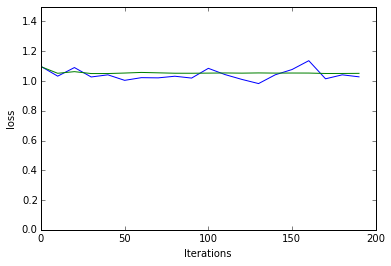

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:47:48.634306. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [35]:
plt.plot(iter_list,loss_list_training)
plt.plot(iter_list,loss_list_validation)
plt.axis([0, 200, 0, 1.5])
plt.ylabel('loss')
plt.xlabel('Iterations')
plt.show()


## plotting of accuracy with each iteration¶

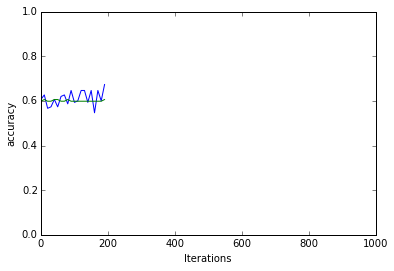

/usr/lib/python2.7/dist-packages/simplejson/encoder.py:269: DeprecationWarning: Interpreting naive datetime as local 2017-04-30 11:47:09.591100. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [34]:
plt.plot(iter_list,accuracy_list_training)
plt.plot(iter_list,accuracy_list_validation)
plt.axis([0, 1000, 0, 1])
plt.ylabel('accuracy')
plt.xlabel('Iterations')
plt.show()
